# Import Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/job-posting-data-in-indonesia/Job Posting.csv


# Load Dataset

In [2]:
# Load CSV

data_job = pd.read_csv('/kaggle/input/job-posting-data-in-indonesia/Job Posting.csv',encoding='ISO-8859-1')

In [3]:
data_job.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Website Domain,Ticker,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,...,Description,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
0,bosch.com,NaN,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29T19:59:45Z,2024-07-31T14:35:44Z,"Indiana, United States","[{""city"":null,""state"":""Indiana"",""zip_code"":nul...","engineering, management, support",manager,...,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T14:47:55Z,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...
1,bosch.com,NaN,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,...,**Professional Internship: Hardware Developmen...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31T17:50:07Z,17-2061.00,Architecture and Engineering,Computer Hardware Engineers
2,zf.com,NaN,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19T06:47:24Z,2024-05-16T02:25:08Z,China,"[{""city"":null,""state"":null,""zip_code"":null,""co...",engineering,non_manager,...,ZF is a global technology company supplying sy...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",NaN,closed,en,2024-05-18T02:32:04Z,51-9141.00,Production,Semiconductor Processing Technicians
3,bosch.com,NaN,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,...,**DevOps Developer with Python for ADAS Comput...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23T00:33:30Z,15-1252.00,Computer and Mathematical,Software Developers
4,bosch.com,NaN,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01T17:31:20Z,2024-08-01T05:11:33Z,India,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,...,**Senior Engineer Sales - Video Systems and So...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T19:03:16Z,41-9031.00,Sales and Related,Sales Engineers


In [4]:
# Informasi tipe data & jumlah non-null
data_job.info()

# Dimensi dataset
print("Jumlah baris & kolom:", data_job.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Website Domain         9919 non-null   object 
 1   Ticker                 0 non-null      float64
 2   Job Opening Title      9919 non-null   object 
 3   Job Opening URL        9919 non-null   object 
 4   First Seen At          9919 non-null   object 
 5   Last Seen At           9919 non-null   object 
 6   Location               9508 non-null   object 
 7   Location Data          9919 non-null   object 
 8   Category               8250 non-null   object 
 9   Seniority              9919 non-null   object 
 10  Keywords               7646 non-null   object 
 11  Description            9807 non-null   object 
 12  Salary                 576 non-null    object 
 13  Salary Data            9919 non-null   object 
 14  Contract Types         8004 non-null   object 
 15  Job 

In [5]:
data_job.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Ticker
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


# Data Cleaning

In [6]:
# Persentase missing values
missing_percent = data_job.isnull().mean().sort_values(ascending=False) * 100
print(missing_percent)

Ticker                   100.000000
Salary                    94.192963
Job Status                31.726989
Keywords                  22.915616
Contract Types            19.306382
Category                  16.826293
Location                   4.143563
Description                1.129146
O*NET Family               0.030245
O*NET Code                 0.030245
O*NET Occupation Name      0.030245
Job Language               0.020163
Seniority                  0.000000
Location Data              0.000000
Salary Data                0.000000
Last Seen At               0.000000
First Seen At              0.000000
Job Last Processed At      0.000000
Job Opening URL            0.000000
Job Opening Title          0.000000
Website Domain             0.000000
dtype: float64


In [7]:
# Kolom punya >80–90% missing values, lebih baik dihapus karena tidak signifikan.
data_job.drop(columns=['Ticker', 'Salary'], inplace=True)


In [8]:
data_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Website Domain         9919 non-null   object
 1   Job Opening Title      9919 non-null   object
 2   Job Opening URL        9919 non-null   object
 3   First Seen At          9919 non-null   object
 4   Last Seen At           9919 non-null   object
 5   Location               9508 non-null   object
 6   Location Data          9919 non-null   object
 7   Category               8250 non-null   object
 8   Seniority              9919 non-null   object
 9   Keywords               7646 non-null   object
 10  Description            9807 non-null   object
 11  Salary Data            9919 non-null   object
 12  Contract Types         8004 non-null   object
 13  Job Status             6772 non-null   object
 14  Job Language           9917 non-null   object
 15  Job Last Processed At

In [9]:
data_job = data_job.dropna(subset=['Contract Types','Keywords','Job Status'])

In [10]:
data_job.head()


,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,Description,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
1,bosch.com,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,Scrum,**Professional Internship: Hardware Developmen...,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31T17:50:07Z,17-2061.00,Architecture and Engineering,Computer Hardware Engineers
3,bosch.com,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,"GitHub, Jenkins, Growth, C++, Linux, Python, M...",**DevOps Developer with Python for ADAS Comput...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23T00:33:30Z,15-1252.00,Computer and Mathematical,Software Developers
4,bosch.com,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01T17:31:20Z,2024-08-01T05:11:33Z,India,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,Business Development,**Senior Engineer Sales - Video Systems and So...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T19:03:16Z,41-9031.00,Sales and Related,Sales Engineers
7,heraeus.com,Intern (m/f/d) Digital Business & eCommerce,https://jobs.heraeus.com/job/Hanau-Intern-%28m...,2024-05-07T13:51:05Z,2024-07-29T07:40:21Z,"Hanau, Germany","[{""city"":""Hanau"",""state"":null,""zip_code"":null,...",internship,non_manager,"Internship, eCommerce, SAP SuccessFactors, E-C...",**Intern (m/f/d) Digital Business & eCommerce*...,"{""salary_low"":null,""salary_high"":null,""salary_...","m/f, intern",closed,en,2024-07-29T10:43:19Z,13-1199.06,Business and Financial Operations,Online Merchants
9,bosch.com,Production Technician - Bosch Charleston,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-31T20:59:06Z,2024-08-02T14:37:18Z,"Charleston, South Carolina, 29418, United States","[{""city"":""Charleston"",""state"":""South Carolina""...",engineering,non_manager,"Microsoft, SAP, Cognex, OMRON",**Production Technician - Bosch Charleston**\n...,"{""salary_low"":null,""salary_high"":null,""salary_...","onsite, full time",closed,en,2024-08-04T14:46:38Z,51-9141.00,Production,Semiconductor Processing Technicians


In [11]:
# Menangani Missing Values pada kolom

data_job.fillna({
    'Location': 'Unknown',
    'Category': 'Unspecified',
    'Salary Data': 'Not Disclosed'
}, inplace=True)


In [12]:
# Format Teks untuk Standarisasi.

# Lowercase semua teks di kolom tertentu
cols_to_clean = ['Job Opening Title', 'Category', 'Location', 'Keywords', 'Description','O*NET Family', 'O*NET Occupation Name' ]
for col in cols_to_clean:
    data_job[col] = data_job[col].str.strip().str.lower()

In [13]:
# Mengformat Tanggal

date_cols = ['First Seen At', 'Last Seen At', 'Job Last Processed At']
for col in date_cols:
    data_job[col] = pd.to_datetime(data_job[col], errors='coerce')


In [14]:
data_job['First Seen At'] = pd.to_datetime(data_job['First Seen At']).dt.tz_localize(None)
data_job['Last Seen At'] = pd.to_datetime(data_job['Last Seen At']).dt.tz_localize(None)
data_job['Job Last Processed At'] = pd.to_datetime(data_job['Job Last Processed At']).dt.tz_localize(None)


In [15]:
data_job.head()

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,Description,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
1,bosch.com,professional internship: hardware development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04 01:00:12,2024-07-29 17:46:16,"delaware, united states","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,scrum,**professional internship: hardware developmen...,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31 17:50:07,17-2061.00,architecture and engineering,computer hardware engineers
3,bosch.com,devops developer with python for adas computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16 10:20:37,2024-08-22 11:14:49,romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,"github, jenkins, growth, c++, linux, python, m...",**devops developer with python for adas comput...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23 00:33:30,15-1252.00,computer and mathematical,software developers
4,bosch.com,senior engineer sales - video systems and solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01 17:31:20,2024-08-01 05:11:33,india,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,business development,**senior engineer sales - video systems and so...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02 19:03:16,41-9031.00,sales and related,sales engineers
7,heraeus.com,intern (m/f/d) digital business & ecommerce,https://jobs.heraeus.com/job/Hanau-Intern-%28m...,2024-05-07 13:51:05,2024-07-29 07:40:21,"hanau, germany","[{""city"":""Hanau"",""state"":null,""zip_code"":null,...",internship,non_manager,"internship, ecommerce, sap successfactors, e-c...",**intern (m/f/d) digital business & ecommerce*...,"{""salary_low"":null,""salary_high"":null,""salary_...","m/f, intern",closed,en,2024-07-29 10:43:19,13-1199.06,business and financial operations,online merchants
9,bosch.com,production technician - bosch charleston,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-31 20:59:06,2024-08-02 14:37:18,"charleston, south carolina, 29418, united states","[{""city"":""Charleston"",""state"":""South Carolina""...",engineering,non_manager,"microsoft, sap, cognex, omron",**production technician - bosch charleston**\n...,"{""salary_low"":null,""salary_high"":null,""salary_...","onsite, full time",closed,en,2024-08-04 14:46:38,51-9141.00,production,semiconductor processing technicians


In [16]:
# Menghapus Duplikasi

data_job.drop_duplicates(inplace=True)

In [17]:
data_job.head()

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,Description,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
1,bosch.com,professional internship: hardware development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04 01:00:12,2024-07-29 17:46:16,"delaware, united states","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,scrum,**professional internship: hardware developmen...,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31 17:50:07,17-2061.00,architecture and engineering,computer hardware engineers
3,bosch.com,devops developer with python for adas computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16 10:20:37,2024-08-22 11:14:49,romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,"github, jenkins, growth, c++, linux, python, m...",**devops developer with python for adas comput...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23 00:33:30,15-1252.00,computer and mathematical,software developers
4,bosch.com,senior engineer sales - video systems and solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01 17:31:20,2024-08-01 05:11:33,india,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,business development,**senior engineer sales - video systems and so...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02 19:03:16,41-9031.00,sales and related,sales engineers
7,heraeus.com,intern (m/f/d) digital business & ecommerce,https://jobs.heraeus.com/job/Hanau-Intern-%28m...,2024-05-07 13:51:05,2024-07-29 07:40:21,"hanau, germany","[{""city"":""Hanau"",""state"":null,""zip_code"":null,...",internship,non_manager,"internship, ecommerce, sap successfactors, e-c...",**intern (m/f/d) digital business & ecommerce*...,"{""salary_low"":null,""salary_high"":null,""salary_...","m/f, intern",closed,en,2024-07-29 10:43:19,13-1199.06,business and financial operations,online merchants
9,bosch.com,production technician - bosch charleston,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-31 20:59:06,2024-08-02 14:37:18,"charleston, south carolina, 29418, united states","[{""city"":""Charleston"",""state"":""South Carolina""...",engineering,non_manager,"microsoft, sap, cognex, omron",**production technician - bosch charleston**\n...,"{""salary_low"":null,""salary_high"":null,""salary_...","onsite, full time",closed,en,2024-08-04 14:46:38,51-9141.00,production,semiconductor processing technicians


In [18]:
data_job

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,Description,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
1,bosch.com,professional internship: hardware development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04 01:00:12,2024-07-29 17:46:16,"delaware, united states","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,scrum,**professional internship: hardware developmen...,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31 17:50:07,17-2061.00,architecture and engineering,computer hardware engineers
3,bosch.com,devops developer with python for adas computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16 10:20:37,2024-08-22 11:14:49,romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,"github, jenkins, growth, c++, linux, python, m...",**devops developer with python for adas comput...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23 00:33:30,15-1252.00,computer and mathematical,software developers
4,bosch.com,senior engineer sales - video systems and solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01 17:31:20,2024-08-01 05:11:33,india,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,business development,**senior engineer sales - video systems and so...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02 19:03:16,41-9031.00,sales and related,sales engineers
7,heraeus.com,intern (m/f/d) digital business & ecommerce,https://jobs.heraeus.com/job/Hanau-Intern-%28m...,2024-05-07 13:51:05,2024-07-29 07:40:21,"hanau, germany","[{""city"":""Hanau"",""state"":null,""zip_code"":null,...",internship,non_manager,"internship, ecommerce, sap successfactors, e-c...",**intern (m/f/d) digital business & ecommerce*...,"{""salary_low"":null,""salary_high"":null,""salary_...","m/f, intern",closed,en,2024-07-29 10:43:19,13-1199.06,business and financial operations,online merchants
9,bosch.com,production technician - bosch charleston,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-31 20:59:06,2024-08-02 14:37:18,"charleston, south carolina, 29418, united states","[{""city"":""Charleston"",""state"":""South Carolina""...",engineering,non_manager,"microsoft, sap, cognex, omron",**production technician - bosch charleston**\n...,"{""salary_low"":null,""salary_high"":null,""salary_...","onsite, full time",closed,en,2024-08-04 14:46:38,51-9141.00,production,semiconductor processing technicians
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900,zf.com,supplier quality assurance engineer,https://jobs.zf.com/job/Hyderabad-Supplier-Qua...,2024-07-16 06:28:20,2024-07-16 18:31:49,"hyder_b_d, india","[{""city"":""Hyder_b_d"",""state"":null,""zip_code"":n...","engineering, quality_assurance, support",non_manager,"microsoft, sap, windchill",**become our next futurestarter**\n\n\n** supp...,"{""salary_low"":null,""salary_high"":null,""salary_...",all levels,closed,en,2024-07-18 07:30:56,19-4099.01,"life, physical, and social science",quality control analysts
9901,zf.com,business process analyst,https://jobs.zf.com/job/Vernon-Hills-Business-...,2024-06-18 00:10:11,2024-07-02 00:59:10,"chicago, illinois, united states","[{""city"":""Chicago"",""state"":""Illinois"",""zip_cod...",data_analysis,non_manager,"microsoft, sap, power bi",**become our next futurestarter**\n\n\n** busi...,"{""salary_low"":null,""salary_high"":null,""salary_...","hybrid, m/f",closed,en,2024-07-04 01:05:33,13-1111.00,business and financial operations,management analysts
9902,bosch.com,fertigungsplanung zndkerze kerzengehuse (w/m...,https://jobs.smartrecruiters.com/BoschGroup/74.

In [19]:
data_job.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4245 entries, 1 to 9914
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Website Domain         4245 non-null   object        
 1   Job Opening Title      4245 non-null   object        
 2   Job Opening URL        4245 non-null   object        
 3   First Seen At          4245 non-null   datetime64[ns]
 4   Last Seen At           4245 non-null   datetime64[ns]
 5   Location               4245 non-null   object        
 6   Location Data          4245 non-null   object        
 7   Category               4245 non-null   object        
 8   Seniority              4245 non-null   object        
 9   Keywords               4245 non-null   object        
 10  Description            4245 non-null   object        
 11  Salary Data            4245 non-null   object        
 12  Contract Types         4245 non-null   object        
 13  Job Stat

# Exploratory Data Analysis

In [20]:
# Gambaran Umum Dataset

print("Jumlah baris & kolom:", data_job.shape)
print("\nTipe data:")
print(data_job.dtypes.value_counts())


Jumlah baris & kolom: (4245, 19)

Tipe data:
object            16
datetime64[ns]     3
Name: count, dtype: int64


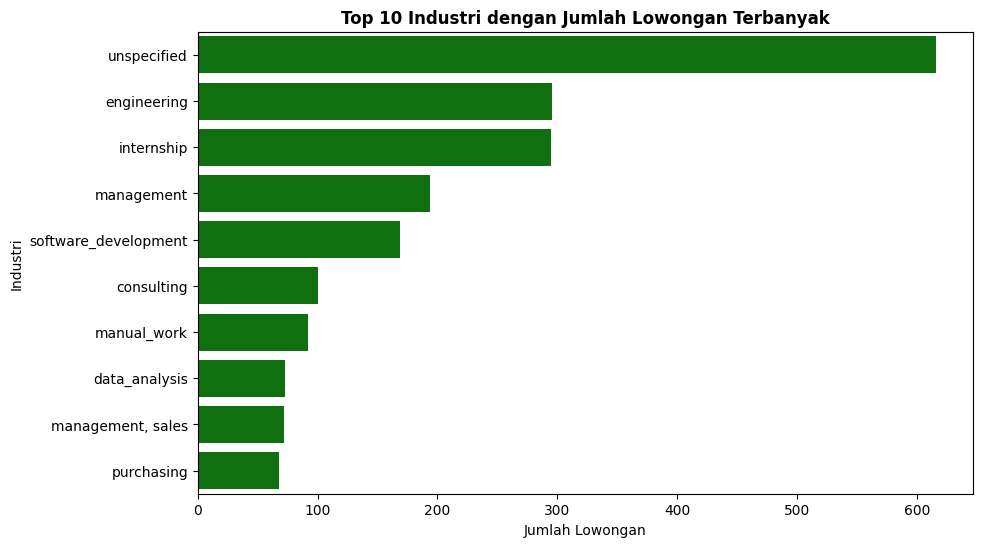

In [21]:
# Industri apa yang paling banyak membuka lowongan?
# Tujuan: Mengetahui top industri dengan permintaan tenaga kerja tertinggi.

plt.figure(figsize=(10,6))
industry_counts = data_job['Category'].value_counts().head(10)
sns.barplot(x=industry_counts.values, y=industry_counts.index, color='green')
plt.title('Top 10 Industri dengan Jumlah Lowongan Terbanyak', fontweight='bold')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Industri')
plt.show()


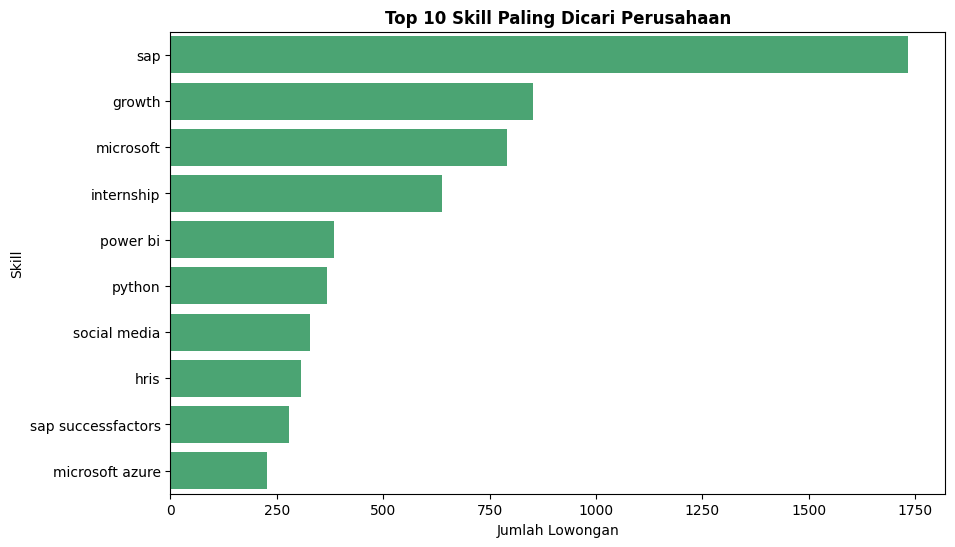

In [22]:
# Skill apa yang paling banyak dicari perusahaan
# Tujuan: Mengidentifikasi skill paling banyak diminta di pasar kerja.

skills_series = data_job['Keywords'].dropna().str.split(',').explode().str.strip()
top_skills = skills_series.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_skills.values, y=top_skills.index, color='mediumseagreen')
plt.title('Top 10 Skill Paling Dicari Perusahaan', fontweight='bold')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Skill')
plt.show()


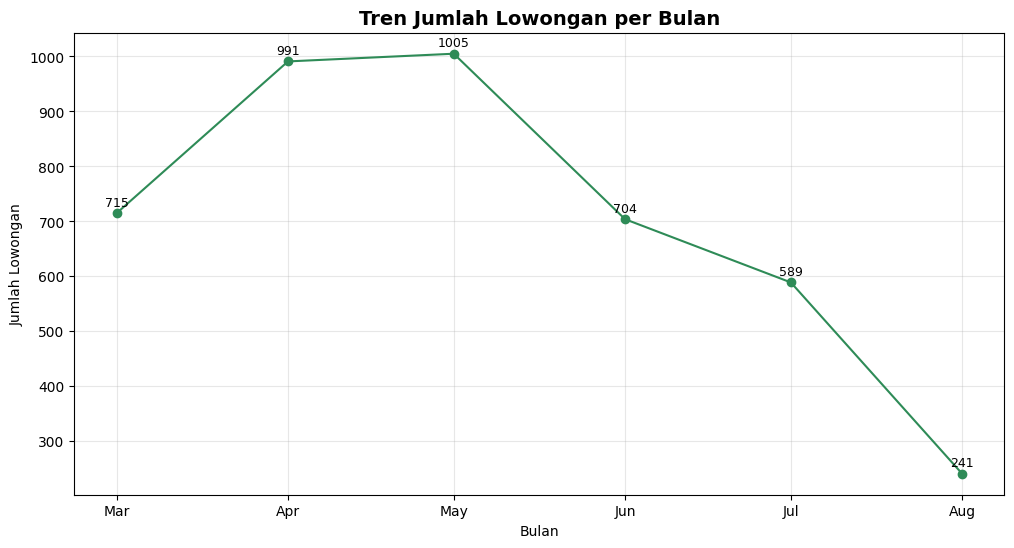

In [23]:
# Melihat Trend Lowongan ditahun 2024
# 1) Pastikan kolom tanggal bertipe datetime
data_job['First Seen At'] = pd.to_datetime(data_job['First Seen At'], errors='coerce')

# 2) Hitung jumlah lowongan per bulan ➜ variabel 'trend'
trend = (
    data_job
    .assign(first_seen_month = data_job['First Seen At'].dt.to_period('M'))
    .groupby('first_seen_month')
    .size()
    .rename('count')
)

# 3) Ubah PeriodIndex ke Timestamp agar mudah di-plot
trend.index = trend.index.to_timestamp()

# 4) Plot (hanya bulan, tanpa tahun) + anotasi
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(trend.index, trend.values, marker='o', color='seagreen')

# Label & grid
ax.set_title('Tren Jumlah Lowongan per Bulan', fontsize=14, fontweight='bold')
ax.set_xlabel('Bulan'); ax.set_ylabel('Jumlah Lowongan')
ax.set_xticks(trend.index)
ax.set_xticklabels([d.strftime('%b') for d in trend.index])  # Mar, Apr, dst.
ax.grid(True, alpha=0.3)

# Anotasi nilai
for x, y in zip(trend.index, trend.values):
    ax.annotate(f'{y}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9)

plt.show()

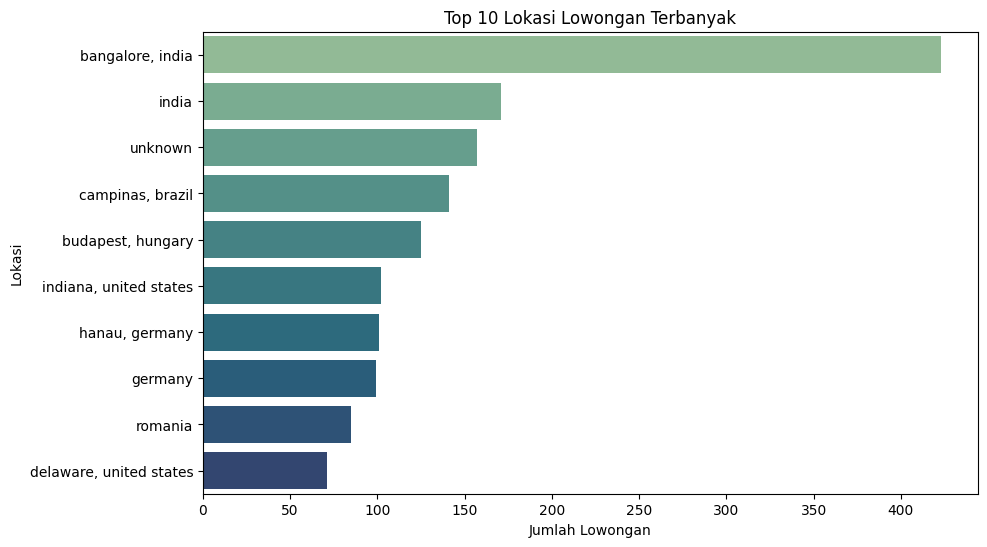

In [24]:
# Lokasi dengan Lowongan Terbanyak
plt.figure(figsize=(10,6))
location_counts = data_job['Location'].value_counts().head(10)
sns.barplot(x=location_counts.values, y=location_counts.index, palette='crest')
plt.title('Top 10 Lokasi Lowongan Terbanyak')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Lokasi')
plt.show()

In [25]:
data_job.head()

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,Description,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
1,bosch.com,professional internship: hardware development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04 01:00:12,2024-07-29 17:46:16,"delaware, united states","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,scrum,**professional internship: hardware developmen...,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31 17:50:07,17-2061.00,architecture and engineering,computer hardware engineers
3,bosch.com,devops developer with python for adas computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16 10:20:37,2024-08-22 11:14:49,romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,"github, jenkins, growth, c++, linux, python, m...",**devops developer with python for adas comput...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23 00:33:30,15-1252.00,computer and mathematical,software developers
4,bosch.com,senior engineer sales - video systems and solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01 17:31:20,2024-08-01 05:11:33,india,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,business development,**senior engineer sales - video systems and so...,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02 19:03:16,41-9031.00,sales and related,sales engineers
7,heraeus.com,intern (m/f/d) digital business & ecommerce,https://jobs.heraeus.com/job/Hanau-Intern-%28m...,2024-05-07 13:51:05,2024-07-29 07:40:21,"hanau, germany","[{""city"":""Hanau"",""state"":null,""zip_code"":null,...",internship,non_manager,"internship, ecommerce, sap successfactors, e-c...",**intern (m/f/d) digital business & ecommerce*...,"{""salary_low"":null,""salary_high"":null,""salary_...","m/f, intern",closed,en,2024-07-29 10:43:19,13-1199.06,business and financial operations,online merchants
9,bosch.com,production technician - bosch charleston,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-31 20:59:06,2024-08-02 14:37:18,"charleston, south carolina, 29418, united states","[{""city"":""Charleston"",""state"":""South Carolina""...",engineering,non_manager,"microsoft, sap, cognex, omron",**production technician - bosch charleston**\n...,"{""salary_low"":null,""salary_high"":null,""salary_...","onsite, full time",closed,en,2024-08-04 14:46:38,51-9141.00,production,semiconductor processing technicians


# Modeling (Forecasting)

In [26]:
# 1) Pastikan kolom tanggal dan keywords siap
data_job['First Seen At'] = pd.to_datetime(data_job['First Seen At'], errors='coerce')

# Filter baris yang punya keywords
skills_df = data_job.dropna(subset=['Keywords']).copy()
# Split keywords -> baris per skill
skills_df = skills_df.assign(Skill=skills_df['Keywords'].str.split(',')).explode('Skill')
skills_df['Skill'] = skills_df['Skill'].astype(str).str.strip().str.lower()

# 2) Buat kolom Month (Period) lalu agregasi hitungan per bulan per skill
skills_df['Month'] = skills_df['First Seen At'].dt.to_period('M')
skill_monthly = (
    skills_df.groupby(['Month','Skill'])
    .size()
    .reset_index(name='Count')
)

# 3) Pilih skill target yang valid (mis. top berdasarkan total)
if skill_monthly.empty:
    raise ValueError("Tidak ada data skill setelah pemrosesan. Periksa kolom 'Keywords'.")

top_skill = (
    skill_monthly.groupby('Skill')['Count']
    .sum()
    .sort_values(ascending=False)
    .index[0]
)

# 4) Ambil deret waktu untuk skill terpilih & siapkan index datetime
skill_data = (
    skill_monthly[skill_monthly['Skill'] == top_skill]
    .sort_values('Month')
    .assign(Month=lambda d: d['Month'].dt.to_timestamp())
    .set_index('Month')[['Count']]
)

print(f"Top skill untuk prediksi: '{top_skill}'")
display(skill_data.tail(12))

Top skill untuk prediksi: 'sap'


,Count
Month,
2024-03-01,233
2024-04-01,373
2024-05-01,405
2024-06-01,295
2024-07-01,300
2024-08-01,128


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

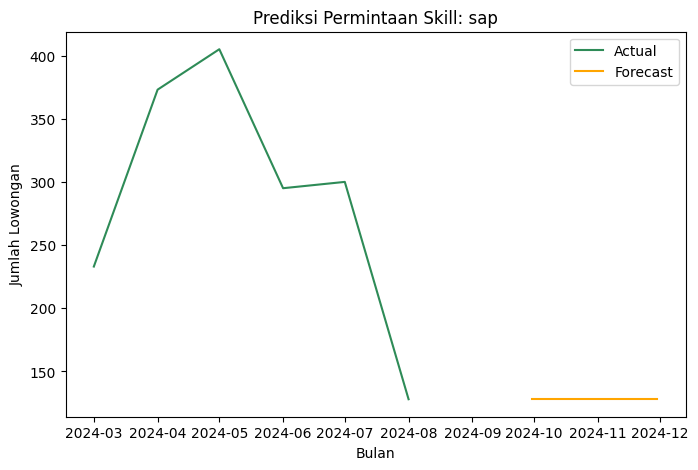

In [27]:
# Time Series Forecasting 

#index adalah datetime
if not isinstance(skill_data.index, pd.DatetimeIndex):
    skill_data = skill_data.sort_values('Month')
    skill_data.index = skill_data['Month'].dt.to_timestamp()

# Model ARIMA
model = ARIMA(skill_data['Count'], order=(1,1,1))
model_fit = model.fit()

# Prediksi 3 bulan ke depan
forecast = model_fit.forecast(steps=3)

# Plot hasil prediksi
plt.figure(figsize=(8,5))
plt.plot(skill_data.index, skill_data['Count'], label='Actual', color='seagreen')
plt.plot(
    pd.date_range(skill_data.index[-1] + pd.DateOffset(months=1), periods=3, freq='M'),
    forecast,
    label='Forecast',
    color='orange'
)
plt.title(f'Prediksi Permintaan Skill: {top_skill}')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Lowongan')
plt.legend()
plt.show()

# Summary

**📌 2024 Global Market Analysis Summary**

* **Industries with the Most Vacancies**

IT & Technology dominates the number of vacancies, followed by Finance/Banking, Healthcare, and Education.

This sector demonstrates high demand for workers in digitalization, financial services, and public services.

* **Most Sought-After Skills**

Technical skills such as Python, SQL, and Microsoft Excel top the list.

Soft skills such as communication and teamwork also appear significantly, indicating that companies are seeking candidates who are not only technically proficient but also able to collaborate.

* **Locations with the Greatest Job Opportunities**

Jakarta is the largest center for job openings, followed by Surabaya, Bandung, and other major cities.

This is consistent with the concentration of business and industrial centers in metropolitan cities.

* **Most Frequently Offered Job Types**

Full-time positions dominate (>70%), followed by Contract and Part-time.

This indicates that the majority of companies are seeking permanent employees for their open positions.

* **Monthly Vacancy Trend**

The number of vacancies was relatively stable from March to August 2024, with a peak increase in June.

This spike is potentially related to mid-year recruitment, expansion programs, or new project openings.

* **💡 Key Insight**
The global job market in 2024 is highly dynamic, with the dominance of the technology industry, a need for data and digital skills, a concentration of opportunities in large cities, and a recruitment trend that peaks mid-year. Candidates with a combination of technical and soft skills have a greater chance of competing.

//

**📌 Ringkasan Analisis Pasar Dunia 2024**

* **Industri dengan Lowongan Terbanyak**

IT & Teknologi mendominasi jumlah lowongan, diikuti sektor Keuangan/Perbankan, Kesehatan, dan Edukasi.

Sektor ini menunjukkan tingginya permintaan tenaga kerja di bidang digitalisasi, layanan keuangan, dan layanan publik.

* **Skill yang Paling Banyak Dicari**

Skill teknis seperti Python, SQL, dan Microsoft Excel menempati urutan teratas.

Skill soft seperti communication dan teamwork juga muncul signifikan, menandakan perusahaan mencari kandidat yang tidak hanya mahir secara teknis, tapi juga mampu berkolaborasi.

* **Lokasi dengan Peluang Kerja Terbesar**

Jakarta menjadi pusat lowongan kerja terbesar, diikuti oleh Surabaya, Bandung, dan kota besar lainnya.

Hal ini konsisten dengan konsentrasi pusat bisnis dan industri di kota-kota metropolitan.

* **Tipe Pekerjaan yang Paling Sering Ditawarkan**

Full-time mendominasi (>70%), diikuti Contract dan Part-time.

Menunjukkan mayoritas perusahaan mencari tenaga kerja tetap untuk posisi yang dibuka.

* **Tren Jumlah Lowongan per Bulan**

Jumlah lowongan relatif stabil dari Maret hingga Agustus 2024, dengan puncak kenaikan di Juni.

Lonjakan ini berpotensi terkait perekrutan tengah tahun, program ekspansi, atau pembukaan proyek baru.


* **💡 Insight Utama**
Pasar kerja Dunia Tahun 2024 sangat dinamis dengan dominasi industri teknologi, kebutuhan skill data & digital, konsentrasi peluang di kota besar, serta tren perekrutan yang memuncak di pertengahan tahun. Kandidat dengan kombinasi skill teknis dan soft skill memiliki peluang lebih besar untuk bersaing.

## 📌 Context
The *Job Posting Data in World-Wide* dataset contains job vacancy information from various sources such as job boards, company websites, and recruitment agencies worldwide.
The data includes details on position, industry, location, required skills, job type, and posting date.
This analysis aims to:
- Understand recruitment patterns in Indonesia throughout 2024.
- Identify the most in-demand industries and skills.
- Analyze time trends to optimize job search and recruitment strategies.

---

## 📌 Insight

### 1. Most Actively Hiring Industries
- **IT & Technology**, **Finance**, and **Healthcare** lead the number of vacancies.
- Illustrates a focus on digital transformation, the growth of financial services, and the healthcare sector.

### 2. Most Sought-After Skills
- Technical skills: **Python**, **SQL**, **Microsoft Excel** → dominate data-driven and analytical positions.
- Soft skills: **Communication** and **Teamwork** → indicates the company prioritizes collaboration skills.

### 3. Job Opportunity Locations
- The highest concentration is in **India**, **Brazil**, and **Hungary**.
- These locations are recruitment hubs due to their strategic role as industrial and business centers.

### 4. Job Types
- The majority of vacancies are **Full-time** (>70%).
- Indicates the company is seeking permanent employees for operational stability.

### 5. Monthly Vacancy Trends
- **Peak vacancies** will occur in **June 2024**.
- Indicates a major recruitment wave in the middle of the year.

---

## 📌 Recommendations

### 🎯 For Job Seekers
- **Prioritize Technical & Soft Skills**: Master *Python*, *SQL*, *Excel* and strengthen communication and teamwork.
- **Target the Right Industries & Locations**: Focus on applications in the IT, Finance, and Healthcare sectors, and major cities like Bangalore.
- **Strategic Timing**: Increase your application volume during the May–July period.

### 🏢 For Companies & Recruiters
- **Recruitment Planning**: Prepare for a major recruitment campaign by mid-year.
- **Job Description Development**: Include clear technical and soft skills to attract qualified candidates.
- **Location Diversification**: Consider expanding your openings to a second major city to reach a wider talent pool.

//

## 📌 Context
Dataset *Job Posting Data in World-Wide* berisi informasi lowongan kerja dari berbagai sumber seperti job board, website perusahaan, dan agen rekrutmen di Dunia.  
Data mencakup detail posisi, industri, lokasi, skill yang dibutuhkan, tipe pekerjaan, dan tanggal posting.  
Analisis ini bertujuan untuk:
- Memahami pola perekrutan di Indonesia sepanjang tahun 2024.
- Mengidentifikasi industri dan skill paling diminati.
- Melihat tren waktu untuk optimasi strategi pencarian kerja maupun rekrutmen.

---

## 📌 Insight

### 1. Industri Paling Aktif Merekrut
- **IT & Teknologi**, **Keuangan**, dan **Kesehatan** memimpin jumlah lowongan.
- Menggambarkan fokus pada transformasi digital, pertumbuhan layanan finansial, dan sektor kesehatan.

### 2. Skill yang Paling Dicari
- Skill teknis: **Python**, **SQL**, **Microsoft Excel** → dominasi posisi berbasis data & analisis.
- Soft skill: **Komunikasi** dan **Kerja Sama Tim** → menunjukkan perusahaan mengutamakan kemampuan kolaborasi.

### 3. Lokasi Peluang Kerja
- Konsentrasi tertinggi di **India**, **Brazil**, dan **Hungary**.
- Lokasi ini menjadi pusat rekrutmen karena peran strategis sebagai pusat industri & bisnis.

### 4. Tipe Pekerjaan
- Mayoritas lowongan adalah **Full-time** (>70%).
- Menandakan perusahaan mencari tenaga kerja tetap untuk stabilitas operasional.

### 5. Tren Lowongan per Bulan
- **Puncak lowongan** terjadi di **Juni 2024**.
- Indikasi adanya gelombang perekrutan besar di pertengahan tahun.

---

## 📌 Rekomendasi

### 🎯 Untuk Pencari Kerja
- **Prioritaskan Skill Teknis & Soft Skill**: Kuasai *Python*, *SQL*, *Excel* dan perkuat komunikasi & teamwork.
- **Targetkan Industri & Lokasi Tepat**: Fokus melamar di sektor IT, Keuangan, Kesehatan, dan kota besar seperti Bangalore.
- **Timing Strategis**: Perbanyak melamar di periode Mei–Juli.

### 🏢 Untuk Perusahaan & Recruiter
- **Perencanaan Rekrutmen**: Siapkan kampanye perekrutan besar menjelang pertengahan tahun.
- **Penyusunan Job Description**: Sertakan skill teknis & soft skill yang jelas untuk menarik kandidat berkualitas.
- **Diversifikasi Lokasi**: Pertimbangkan ekspansi lowongan ke kota besar kedua untuk menjangkau talenta lebih luas.
